# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

In [6]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [7]:
crossingDf = loc2data.getCrossingDf()

pedIds: 100%|██████████| 154/154 [00:21<00:00,  7.29it/s]
INFO:root:extracting crossing data for scene 2 from recording 18
pedIds: 100%|██████████| 154/154 [00:20<00:00,  7.34it/s]
INFO:root:extracting crossing data for scene 3 from recording 18
pedIds: 100%|██████████| 154/154 [00:21<00:00,  7.31it/s]
INFO:root:extracting crossing data for scene 4 from recording 18
pedIds: 100%|██████████| 154/154 [00:21<00:00,  7.31it/s]
INFO:root:extracting crossing data for scene 5 from recording 18
pedIds: 100%|██████████| 154/154 [00:20<00:00,  7.35it/s]
INFO:root:extracting crossing data for scene 6 from recording 18
pedIds: 100%|██████████| 154/154 [00:20<00:00,  7.35it/s]
INFO:root:got crossing df for 18
pedIds: 100%|██████████| 122/122 [00:13<00:00,  8.86it/s]
INFO:root:extracting crossing data for scene 2 from recording 19
pedIds: 100%|██████████| 122/122 [00:13<00:00,  8.87it/s]
INFO:root:extracting crossing data for scene 3 from recording 19
pedIds: 100%|██████████| 122/122 [00:13<00:00,  

In [10]:
loc2data.saveCrossingDf("../data/localtion2.data.csv")

# Validate if there are trajectories not captured by the scene-based extractor

In [11]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

2022-09-26 10:49:05.433 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


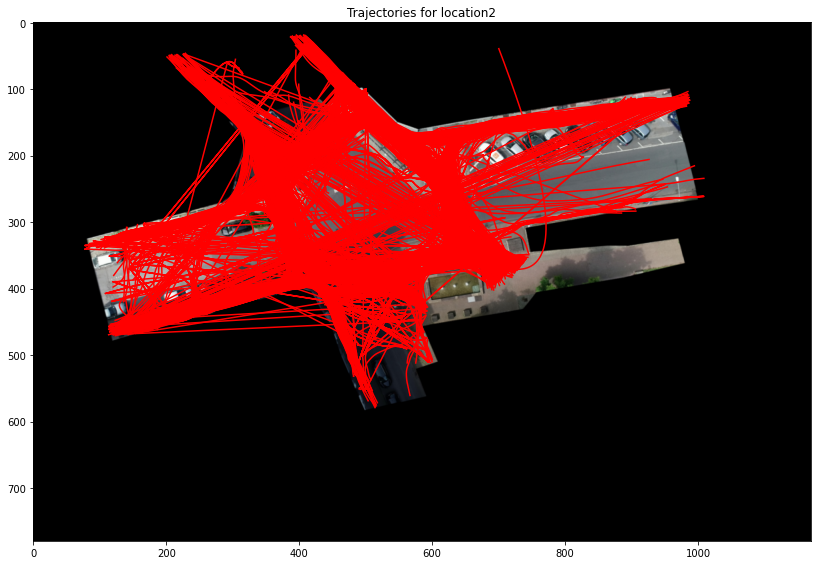

In [13]:
# visualizer.showLocationCrossingTracks(loc2data)

In [25]:
sceneData = loc2data.getSceneCrossingData(1, 10, 5, refresh=False)
# sceneDf = loc2data.getSceneCrossingDf('1', 0, 0)

In [21]:
sceneData.data.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId
0,18,23,286,0,47.32667,-10.09111,316.84658,0.0,0.0,0.85962,-0.78300,-0.00390,-0.08807,18023,1
1,18,23,287,1,47.36134,-10.12231,316.83139,0.0,0.0,0.85997,-0.78700,-0.00491,-0.08913,18023,1
2,18,23,288,2,47.39602,-10.15368,316.81295,0.0,0.0,0.86016,-0.79111,-0.00629,-0.08979,18023,1
3,18,23,289,3,47.43071,-10.18521,316.79140,0.0,0.0,0.86019,-0.79532,-0.00793,-0.08998,18023,1
4,18,23,290,4,47.46540,-10.21692,316.76687,0.0,0.0,0.86003,-0.79962,-0.00974,-0.08964,18023,1


2022-09-26 11:06:32.905 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


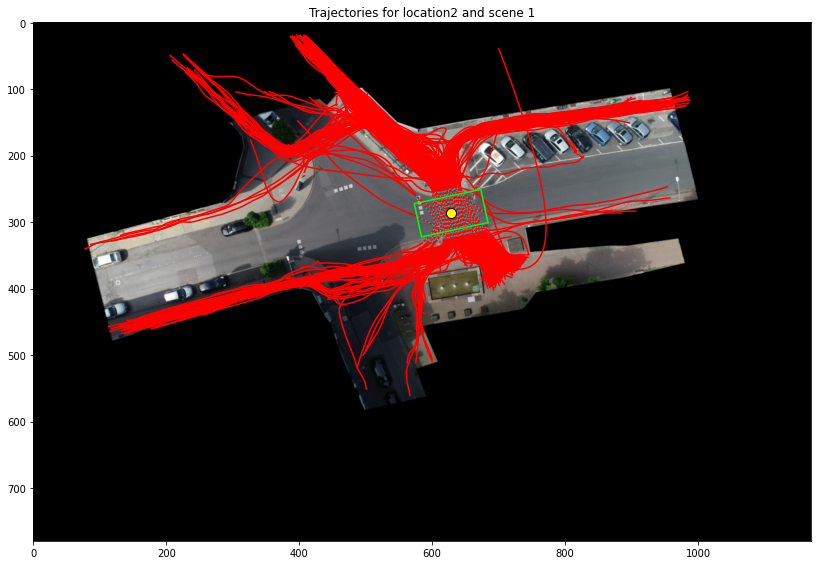

In [22]:
visualizer.showLocationSceneData(sceneData)

2022-09-26 11:23:50.851 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


18


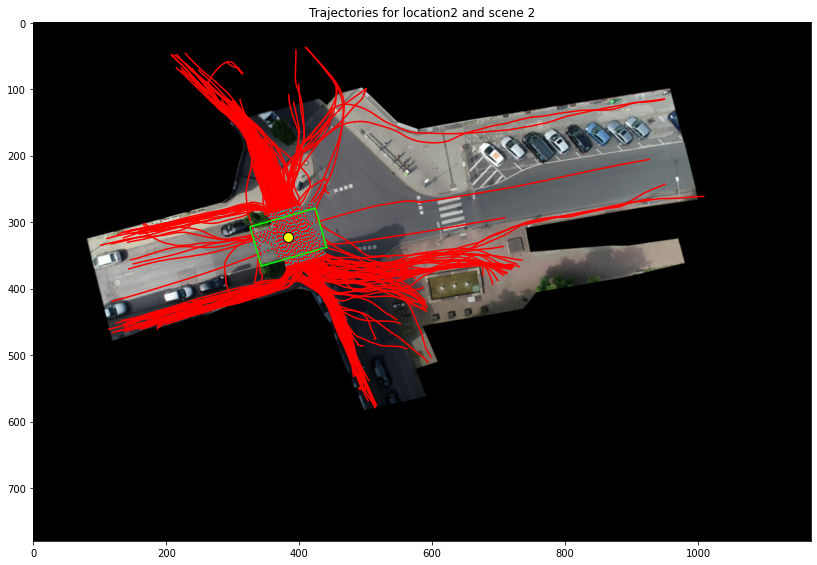

In [38]:
scene2Data = loc2data.getSceneCrossingData(2, 10, 6, refresh=False)
# scene2Data.data.head()
visualizer.showLocationSceneData(scene2Data)

2022-09-26 11:24:44.417 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 11:24:44.440 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 11:24:44.441 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 371/371 [01:16<00:00,  4.86it/s]
2022-09-26 11:26:10.432 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


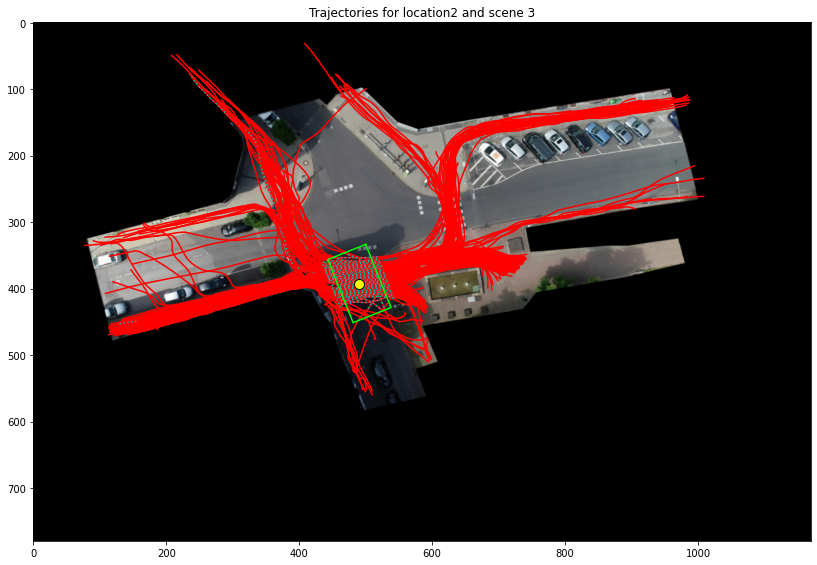

In [39]:
scene3Data = loc2data.getSceneCrossingData(3, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene3Data)

2022-09-26 11:27:01.142 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 11:27:01.153 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 11:27:01.154 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories:  21%|██        | 28/135 [00:03<00:13,  7.69it/s]2022-09-26 11:27:04.678 | DEBUG    | extractors.SceneData:_clip:136 - Disregarding trajectory for 21115 because the length is too low
2022-09-26 11:27:04.749 | DEBUG    | extractors.SceneData:_clip:136 - Disregarding trajectory for 21119 because the length is too low
clipping trajectories: 100%|██████████| 135/135 [00:17<00:00,  7.60it/s]
2022-09-26 11:27:21.704 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


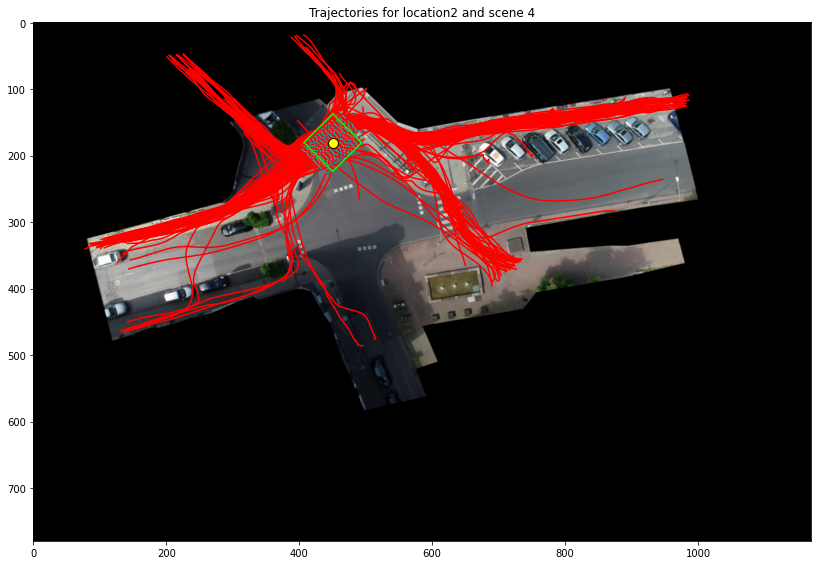

In [40]:
scene4Data = loc2data.getSceneCrossingData(4, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene4Data)

2022-09-26 11:37:36.740 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


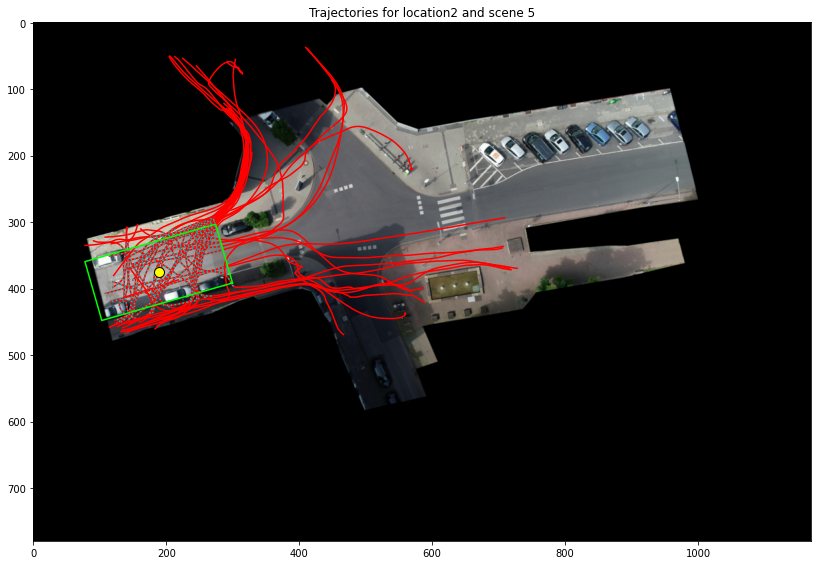

In [42]:
scene5Data = loc2data.getSceneCrossingData(5, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene5Data, onlyClipped=False)

2022-09-26 11:48:15.076 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 11:48:15.079 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 11:48:15.079 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories:  87%|████████▋ | 20/23 [00:01<00:00, 11.08it/s]2022-09-26 11:48:17.088 | DEBUG    | extractors.SceneData:_clip:136 - Disregarding trajectory for 29174 because the length is too low
2022-09-26 11:48:17.173 | DEBUG    | extractors.SceneData:_clip:136 - Disregarding trajectory for 29209 because the length is too low
clipping trajectories: 100%|██████████| 23/23 [00:02<00:00, 10.70it/s]
2022-09-26 11:48:18.015 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


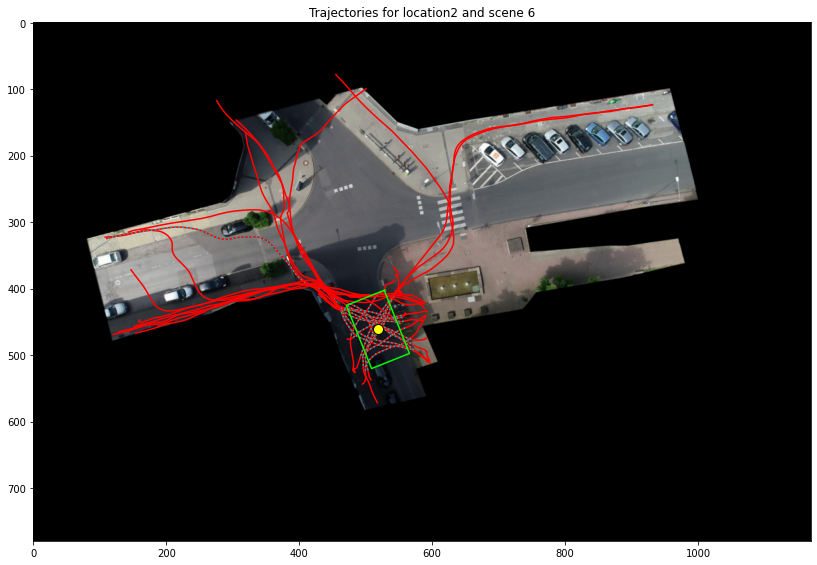

In [43]:
scene6Data = loc2data.getSceneCrossingData(6, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene6Data)